# 第3回課題：楽器の音を分析しよう

**課題は図が描画されている状態で保存して提出してください！**

## 課題１：振幅スペクトルの描画

`sound/Violin.wav`を開いて、その波形の振幅スペクトルを描画し、`exp3_1.png`という名前の画像として保存してください。   
振幅値$x$は$20 \log_{10}(x)$によりデシベル値に変換してください。  
サンプリングレートはwaveオブジェクトから`wave.getframerate()`を使って受け取ってください。   
x軸は周波数（単位はHz)、y軸は振幅のdB値とします。   
次のようなグラフになったらOKです。
<img src="fig/exp3_ans1.png" width="640">


<IPython.core.display.Javascript object>


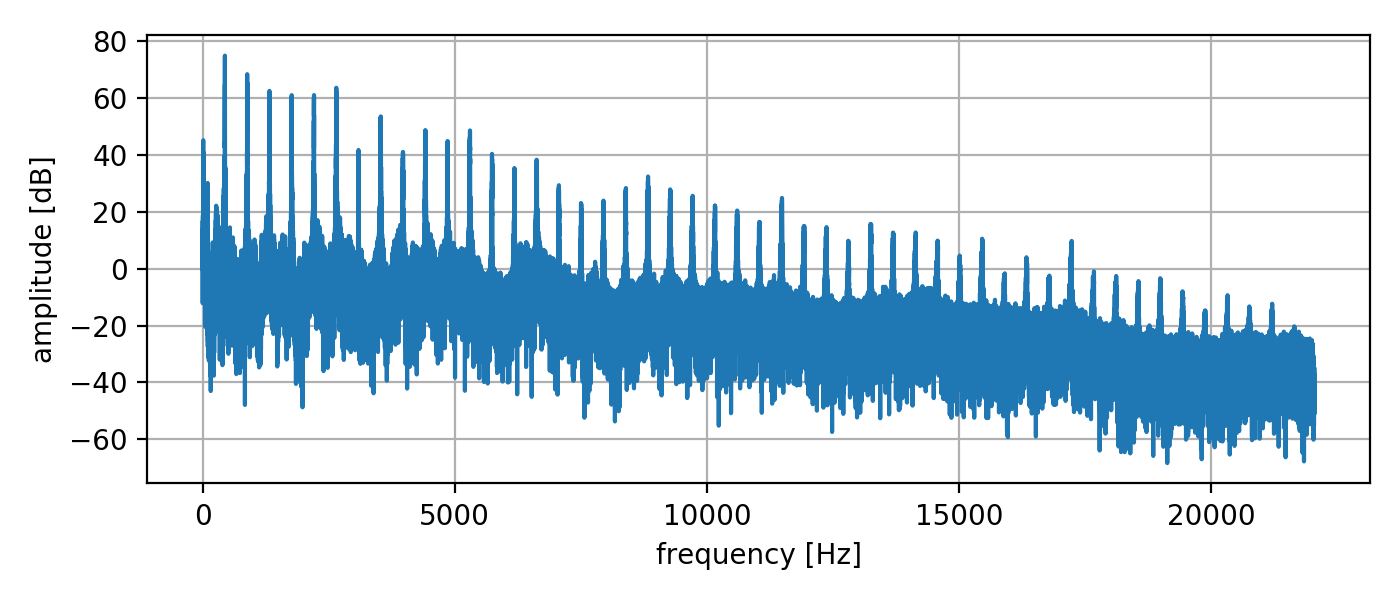

In [1]:
%matplotlib notebook
import wave
import numpy as np
import matplotlib.pyplot as plt

wavfile = wave.open('sounds/Violin.wav', 'rb')
x = wavfile.readframes(wavfile.getnframes()) # 波形の読み込み
sampling_rate = wavfile.getframerate()  # フレームレート[1/s]
sample_size = wavfile.getsampwidth() # 1サンプルあたりのサイズ
wavfile.close()

x = np.frombuffer(x, dtype= "int16") # バイナリデータをint型に変換
x = x/(2**(8 * sample_size) / 2)# 正規化

### FFTで高速フーリエ変換
X = np.fft.fft(x)  

amplitude = 20*np.log10(np.abs(X))  # 振幅スペクトル
x_axis = [i/len(X)*sampling_rate for i in range(0, int(len(X)/2)-1)]

fig = plt.figure(figsize=(7, 3)) # figure(図を配置する画面)のサイズを指定
ax = plt.subplot() # figureには複数の図を配置できるので、そのうち図を1つ描画する空間を準備
ax.plot(x_axis[0:int(len(X)/2-1)], amplitude[0:int(len(X)/2)-1])
ax.set_xlabel("frequency [Hz]")
ax.set_ylabel("amplitude [dB]")
ax.grid()
fig.tight_layout() # 図がはみ出さないようにレイアウト
plt.savefig('exp3_1.png') # 図を画像として保存

## 課題２：スペクトログラムの描画

ヴァイオリンの音楽`sounds/Violin-music.wav`のスペクトログラムを描画し、`exp3_2.png`という名前の画像として保存してください。   
スペクトログラム計算時のパラメータは以下の通りです（これは教材と同じです）。
- 窓幅は512
- 移動窓における重なり（オーバーラップ）は0（つまり重ならない）
- 窓関数はハミング窓

次のようなグラフになったらOKです。
<img src="fig/exp3_ans2.png" width="640">


48000


<IPython.core.display.Javascript object>


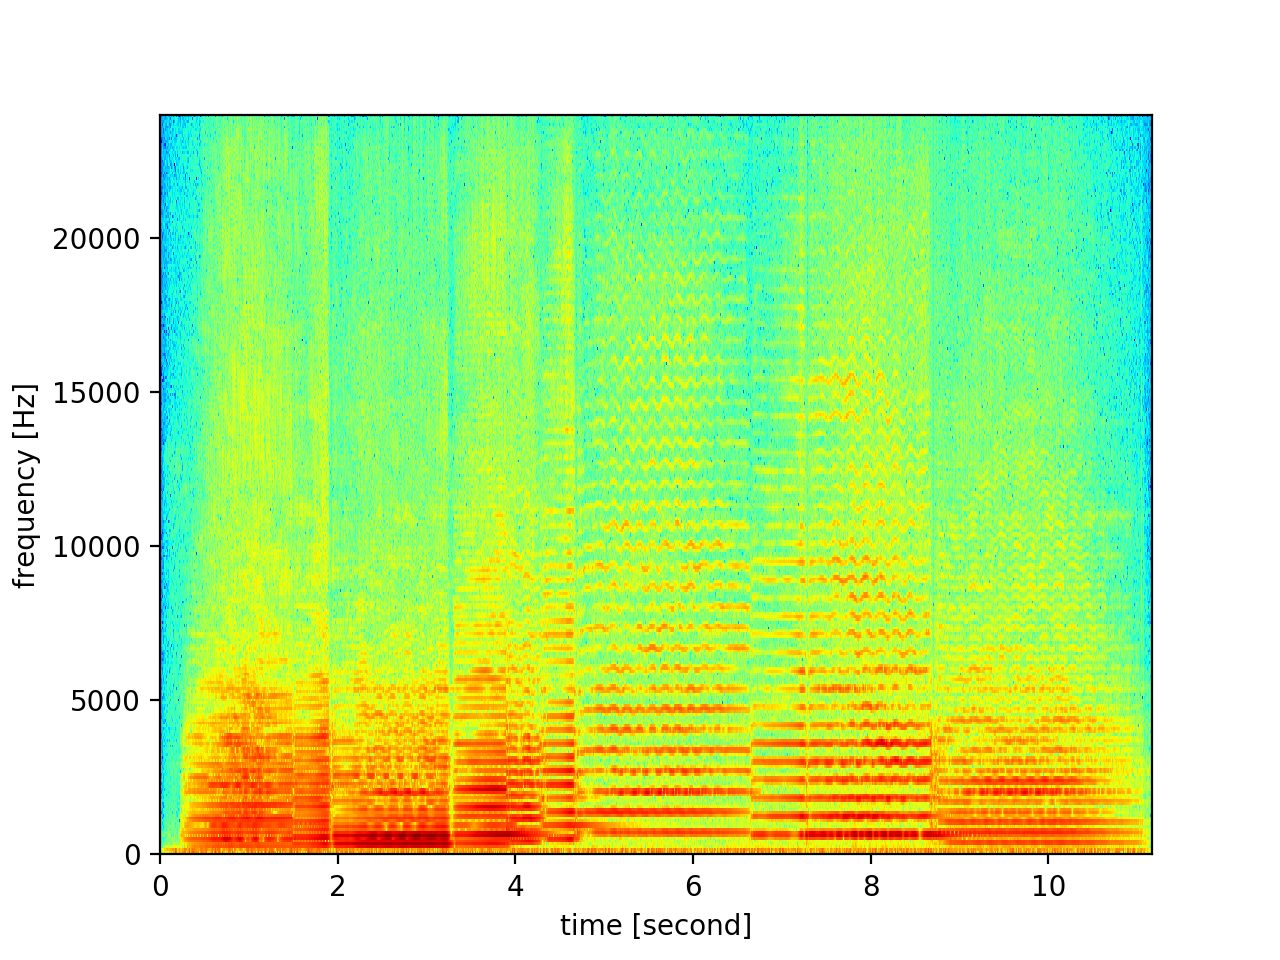

In [2]:
%matplotlib notebook

import wave
from pylab import *
import numpy as np

wavfile = wave.open("sounds/Violin-music.wav" , "rb" ) # オーディオファイルを開く

# wavfileのデータを最後まで一気に読み込む（データサイズが大きいファイルを読み込むときは、読み込むサイズを指定しないとPCがフリーズします）。
x = wavfile.readframes(wavfile.getnframes())
x = np.frombuffer(x, dtype= "int16") # バイナリデータをint型に変換
sampling_rate = wavfile.getframerate()
print(sampling_rate)
wavfile.close()

# 短く切り出すときの幅（切り出すフレームの数）
N = 512

# FFTで用いるハミング窓
hammingWindow = np.hamming(N)

# スペクトログラムを描画
# cmap
pxx, freqs, bins, im = specgram(x,# 元の波形 
                                NFFT=N, # 切り出す幅
                                Fs=sampling_rate, # サンプリングレート
                                noverlap=0, # 0から順番に切り出していくとき、重複して切り出すならここで重複させるフレーム数を指定
                                window=hammingWindow, # 窓関数の指定
                                cmap=cm.jet) # カラーマップ：値の大きさによって色を塗り分ける。

#axis([0, length, 0, wf.getframerate() / 2])
xlabel("time [second]")
ylabel("frequency [Hz]")
plt.savefig('fig/SoundProcessing4-1.png') # 図を画像として保存